# 3. Linear Regression – Applied

In [1]:
from pathlib import Path
import pandas as pd
import statsmodels.api  as sm
from statsmodels.graphics.gofplots import ProbPlot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy import stats
plt.style.use('classic') # pretty matplotlib plots
sns.set_style(style='white')

warnings.filterwarnings('ignore')

### Q8. This question involves the use of simple linear regression on the Auto data set.

In [2]:
path = Path('Data/Auto.csv')

In [3]:
Auto = pd.read_csv(path)
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### **(a)** Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:

- i. Is there a relationship between the predictor and the response?
- ii. How strong is the relationship between the predictor and the response?
- iii. Is the relationship between the predictor and the response positive or negative?
- iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [5]:
data = Auto[['horsepower', 'mpg']].sort_values('horsepower')
X1 = data['horsepower']
Y = data['mpg']
X = sm.add_constant(X1)

(0.0, 250.0)

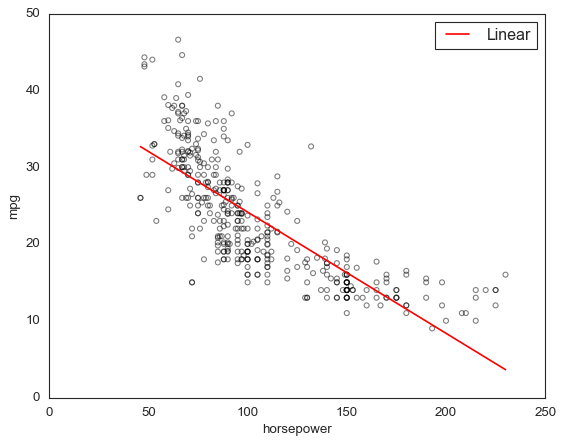

In [6]:
axes = sns.regplot(X1, Y, ci=None, label='Linear', scatter=False, color='red')
axes.scatter(X1, Y, facecolors='None', edgecolors='k', alpha=.5)
axes.legend()
axes.set_xlim([0, 250])

In [7]:
results = sm.OLS(Y,X).fit()

In [8]:
results.params

const         39.935861
horsepower    -0.157845
dtype: float64

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           7.03e-81
Time:                        16:05:04   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. Is there a relationship between the predictor and the response? 
> We can answer this question by testing the null hypothesis. 
The p-value corresponding to the F-statistic is very small, indicating a clear evidence of a relationship between “mpg” and “horsepower”.

ii. How strong is the relationship between the predictor and the response?
> We can use the residual standard error and the R-squared value for answering this question.
The mean of mpg is 23.4459184. The RSE of the fit was 4.9057569 which indicates a percentage error of about 20.9%. 
We may also note that as the R$^2$ is equal to 0.6059483, almost 60.5948258% of the variability in “mpg” can be explained 
using “horsepower”.

>In Python statsmodel we can calculate residual standard error or the residual standard deviation by taking the square root of the scale attribute:
*print(np.sqrt(results.scale))*
Or we can calculate mannually: 
*print(np.sqrt(np.divide(results.ssr, np.subtract(len(Auto), 2))))*

iii. Is the relationship between the predictor and the response positive or negative?
>This is can be answered by looking at the plotted regression line or the regression coeficient. 
Since horsepower is negative the relationship is also negative, meaning that more horsepower results in less mpg.

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% conﬁdence and prediction intervals?

In [10]:
ex = [1, 98]
pred1 = results.get_prediction(ex).summary_frame(alpha=0.05)
print(f"The predicted mpg associated with {ex[1]} is {pred1['mean'][0]:.2f}.")

The predicted mpg associated with 98 is 24.47.


In [11]:
print(f"The associated confidence and prediction intervals are: [{pred1['mean_ci_lower'][0]:.2f}, {pred1['mean_ci_upper'][0]:.2f}] and [{pred1['obs_ci_lower'][0]:.2f}, {pred1['obs_ci_upper'][0]:.2f}]")

The associated confidence and prediction intervals are: [23.97, 24.96] and [14.81, 34.12]


#### **(b)** Plot the response and the predictor. Use the abline() function to display the least squares regression line.

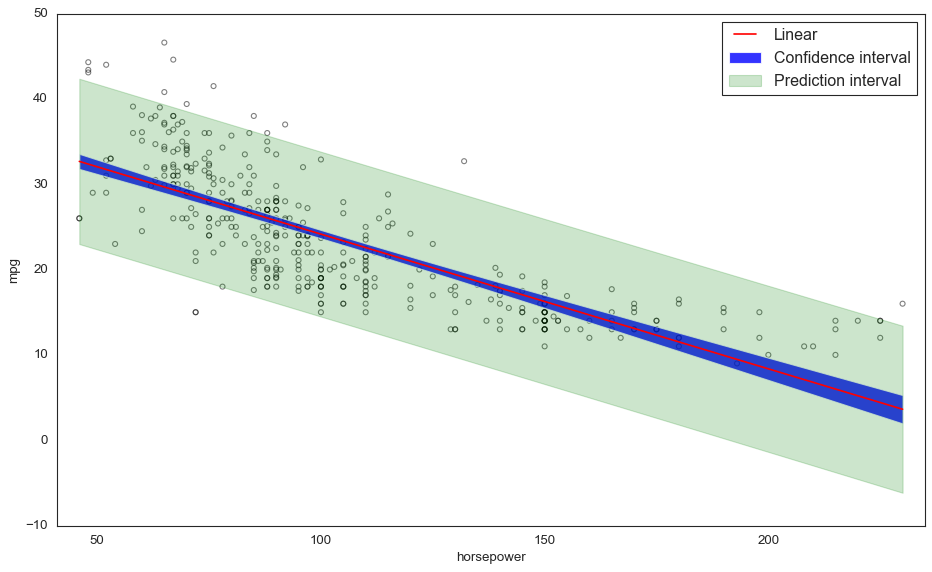

In [12]:
# Plotting the the linear regression with confidence and prediction intervals
pred2 = results.get_prediction(X).summary_frame(alpha=0.05)

fig = plt.figure(figsize=(14,8))
axes = sns.regplot(X1, Y, ci=None, label='Linear', scatter=False, color='red')

axes.scatter(X1, Y, facecolors='None', edgecolors='k', alpha=.5)
axes.fill_between(X1, pred2['mean_ci_lower'], pred2['mean_ci_upper'], alpha=.8, label='Confidence interval')
axes.fill_between(X1, pred2['obs_ci_lower'], pred2['obs_ci_upper'], alpha=.2, label='Prediction interval', color='green')


axes.set_xlim([X1.min()-5, X1.max()+5])
axes.legend()

#### **(c)** Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

In [13]:
fitted_values = results.fittedvalues
residuals = results.resid
studentized_residuals = results.get_influence().resid_studentized_external
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(studentized_residuals))
# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]

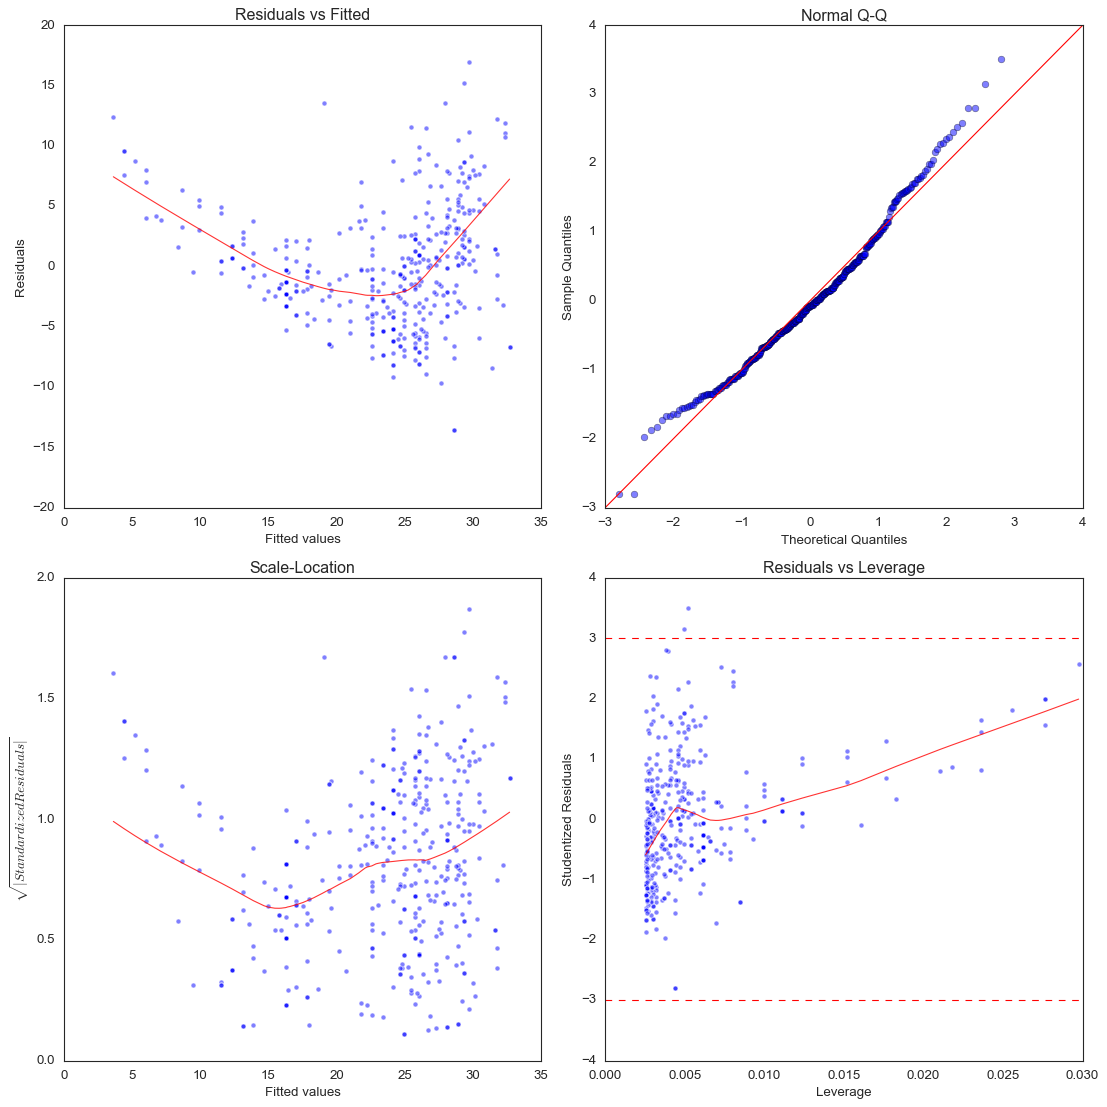

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(14, 14))

# Residual vs Fitted
sns.regplot(fitted_values, residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax1);

ax1.scatter(fitted_values, residuals, alpha=0.5);
ax1.set_title('Residuals vs Fitted')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals');

# Q-Q plot
QQ = ProbPlot(studentized_residuals)
QQ.qqplot(line='45', alpha=0.5, color='blue', lw=1, ax=ax2)
ax2.set_title('Normal Q-Q')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Sample Quantiles');

# Scale-location
sns.regplot(fitted_values, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax3);
ax3.scatter(fitted_values, model_norm_residuals_abs_sqrt, alpha=0.5);
ax3.set_title('Scale-Location')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('$\sqrt{|Standardized Residuals|}$');

# Residuals vs Leverage
sns.regplot(model_leverage, studentized_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax4);

ax4.scatter(model_leverage, studentized_residuals, alpha=0.5);
ax4.axhline(y=3, color='red', linestyle='--')
ax4.axhline(y=-3, color='red', linestyle='--')
ax4.set_title('Residuals vs Leverage')
ax4.set_xlabel('Leverage')
ax4.set_ylabel('Studentized Residuals');

fig.tight_layout()
plt.show()



Residuals vs Fitted: This plot clearly shows the non-linear behavior of the data. Non linear transformation of the predictors might solve this problem. Also, the residual plot suggest that the model violates the constant variance assumption.

